# Programming Tools - OpenMP
### Set 2a
### Papadopoulou Martha
### AEM: 4438

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
pi_data = []
with open("pi_data.txt", "r") as file_pi:
    for line in file_pi:
        pi_data.append(float(line.strip()))
print("For", len(pi_data), "runs of the code, the mean value of pi is", np.mean(pi_data))

For 8 runs of the code, the mean value of pi is 3.1415082165


In [3]:
time_data = []
with open("time_data.txt", "r") as file_time:
    for line in file_time:
        time_data.append(float(line.strip()))

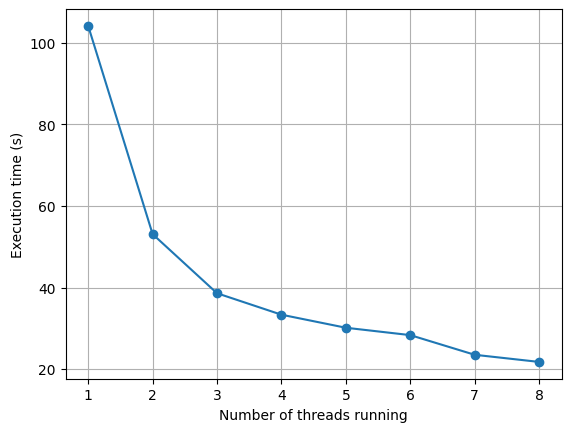

In [4]:
number_of_threads = list(range(1, len(time_data)+1))
plt.plot(number_of_threads, time_data, marker='o')
plt.xlabel("Number of threads running")
plt.ylabel("Execution time (s)")
plt.grid(True)
plt.show()

In [5]:
par_speedup = []
for i in range(1, len(time_data)):
    speedup = time_data[0]/time_data[i]
    par_speedup.append(speedup)

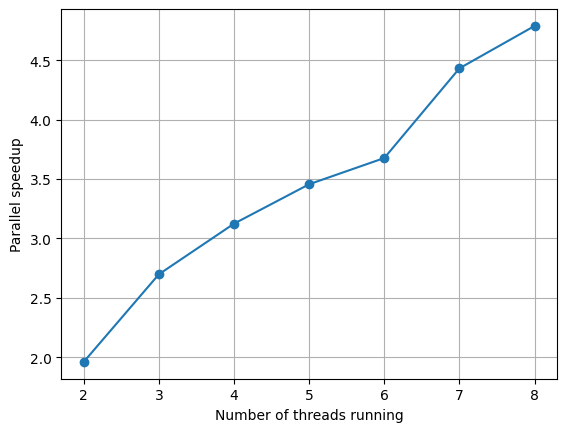

In [6]:
plt.plot(number_of_threads[1:], par_speedup, marker='o')
plt.xlabel("Number of threads running")
plt.ylabel("Parallel speedup")
plt.grid(True)
plt.show()

In [7]:
def amdahls_law(N, p):
    return 1 / ((1 - p) + p / N)

In [8]:
p_opt, p_cov = curve_fit(amdahls_law, number_of_threads[1:], par_speedup)
amdahl_speedup = amdahls_law(number_of_threads[1:], *p_opt)
print("The proportion of the code that benefits from parallelization p is", round(*p_opt,4))

The proportion of the code that benefits from parallelization p is 0.8984


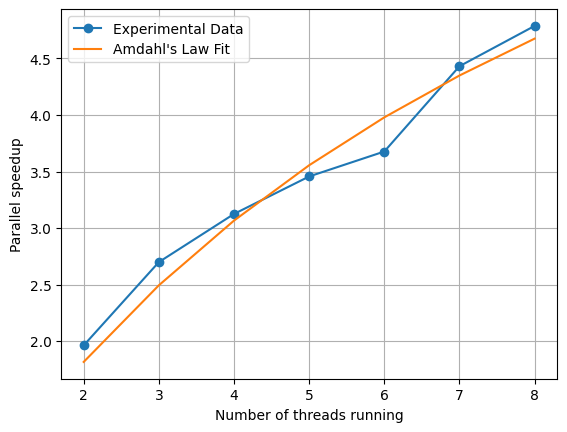

In [9]:
plt.plot(number_of_threads[1:], par_speedup, marker='o', label='Experimental Data')
plt.plot(number_of_threads[1:], amdahl_speedup, label='Amdahl\'s Law Fit')
plt.xlabel("Number of threads running")
plt.ylabel("Parallel speedup")
plt.grid(True)
plt.legend()
plt.show()

In [10]:
cores_given = 10000
S_max = 1 / (1-p_opt[0] + p_opt[0]/cores_given)
print("The maximum possible speedup in the limit of", cores_given, "cores is", S_max)

The maximum possible speedup in the limit of 10000 cores is 9.835706755195387
